In [36]:
import glob
import os
import numpy as np
import pandas as pd
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
%matplotlib inline

# ACT REPORT
My initial intro to the project of we rate dogs was of pure excitement because it was the first project with a blank jupyter notebook that let the students scrap the web, generate and clean a dataset. 
We also got a brief intro into twitter's API tweepy which is used to query tweetid, retweets, and favorite tweets.

Here are a few insights I gathered from the project.

We rate dog twitter handle consist of a lot of adorable dog pictures to generate a Dataset I needed the We_rate_dogs twitter archive. Luckily this was provided by Udacity.
Another valuable asset provided by Udacity was the image_prediction tsv file provided via URL. This file consisted of predicted dog types concerning the tweet_id. The rest I would have to obtain myself.

I imported in the provided twitter archive csv I used pandas read.csv function.
~~~ python
twitter_archive = pd.read_csv("data/twitter-archive-enhanced.csv")
~~~

The tsv file is located on a website to download the provided image-prediction tsv file I used python's request module this file needs to be downloaded programmatically:
~~~python
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join("data/", url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)
~~~

The last file needs to be acquired, by querying the status of the twitter_id. We can do this by using Tweepy api.get_status() method. This will give us the contents of a JSON file that we can later export in a text file for our use. 
~~~
tweet = api.get_status(twitter_archive.tweet_id[i], tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
~~~

I then visually, and programmatically assessed that data-frame to identify any corrupt and dirty data. I used my eyes and pandas .info() method for this. The .info() method provides a simple breakdown of one's overall dataset.

After assessing the problems within the dataset I began to merge and clean, and store my finding.

Here's what I found:

#### French Bulldogs are the most retweeted, and favorited dog out of the whole dataset 

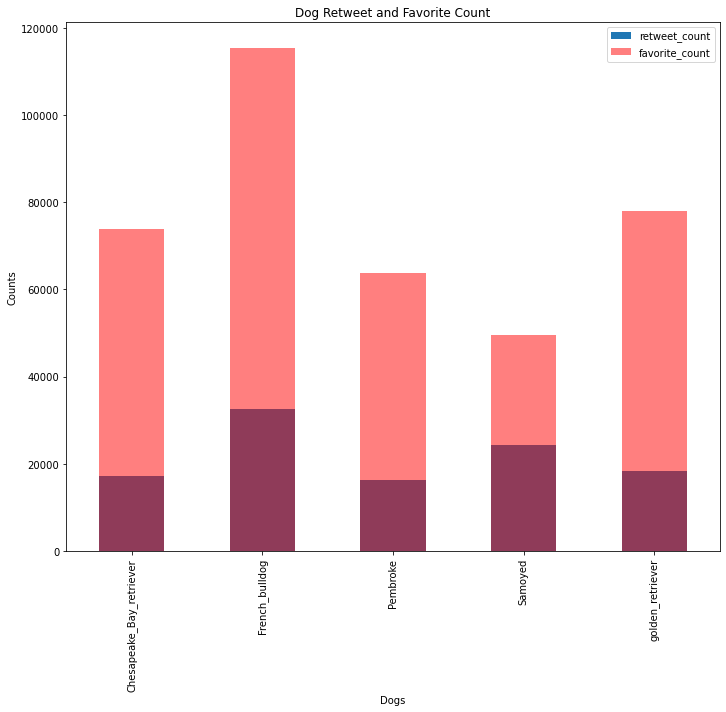

In [60]:
df_dog = pd.read_csv("data/twitter_archive_master.csv", index_col=0)
df_dog = df_dog.query('p1_dog == True and p2_dog == True and p3_dog == True')
df_dog  = df_dog.query('p1_conf >= 0.6 or p2_conf >= 0.6 or p3_conf >= 0.6')
df_dog = df_dog.reset_index(drop=True)
df_dog[df_dog.retweet_count >= 15000].groupby("p1")['retweet_count'].mean().plot(kind="bar", figsize=(10, 10))
df_dog[df_dog.favorite_count >= 45000].groupby("p1")['favorite_count'].mean().plot(kind="bar", figsize=(10, 10), color="r", alpha=0.5)
plt.legend()
plt.title("Dog Retweet and Favorite Count")
plt.xlabel("Dogs")
plt.tight_layout()
plt.ylabel("Counts");

#### Most users post Golden Retriever it appears to be the most Favorited Dog posted

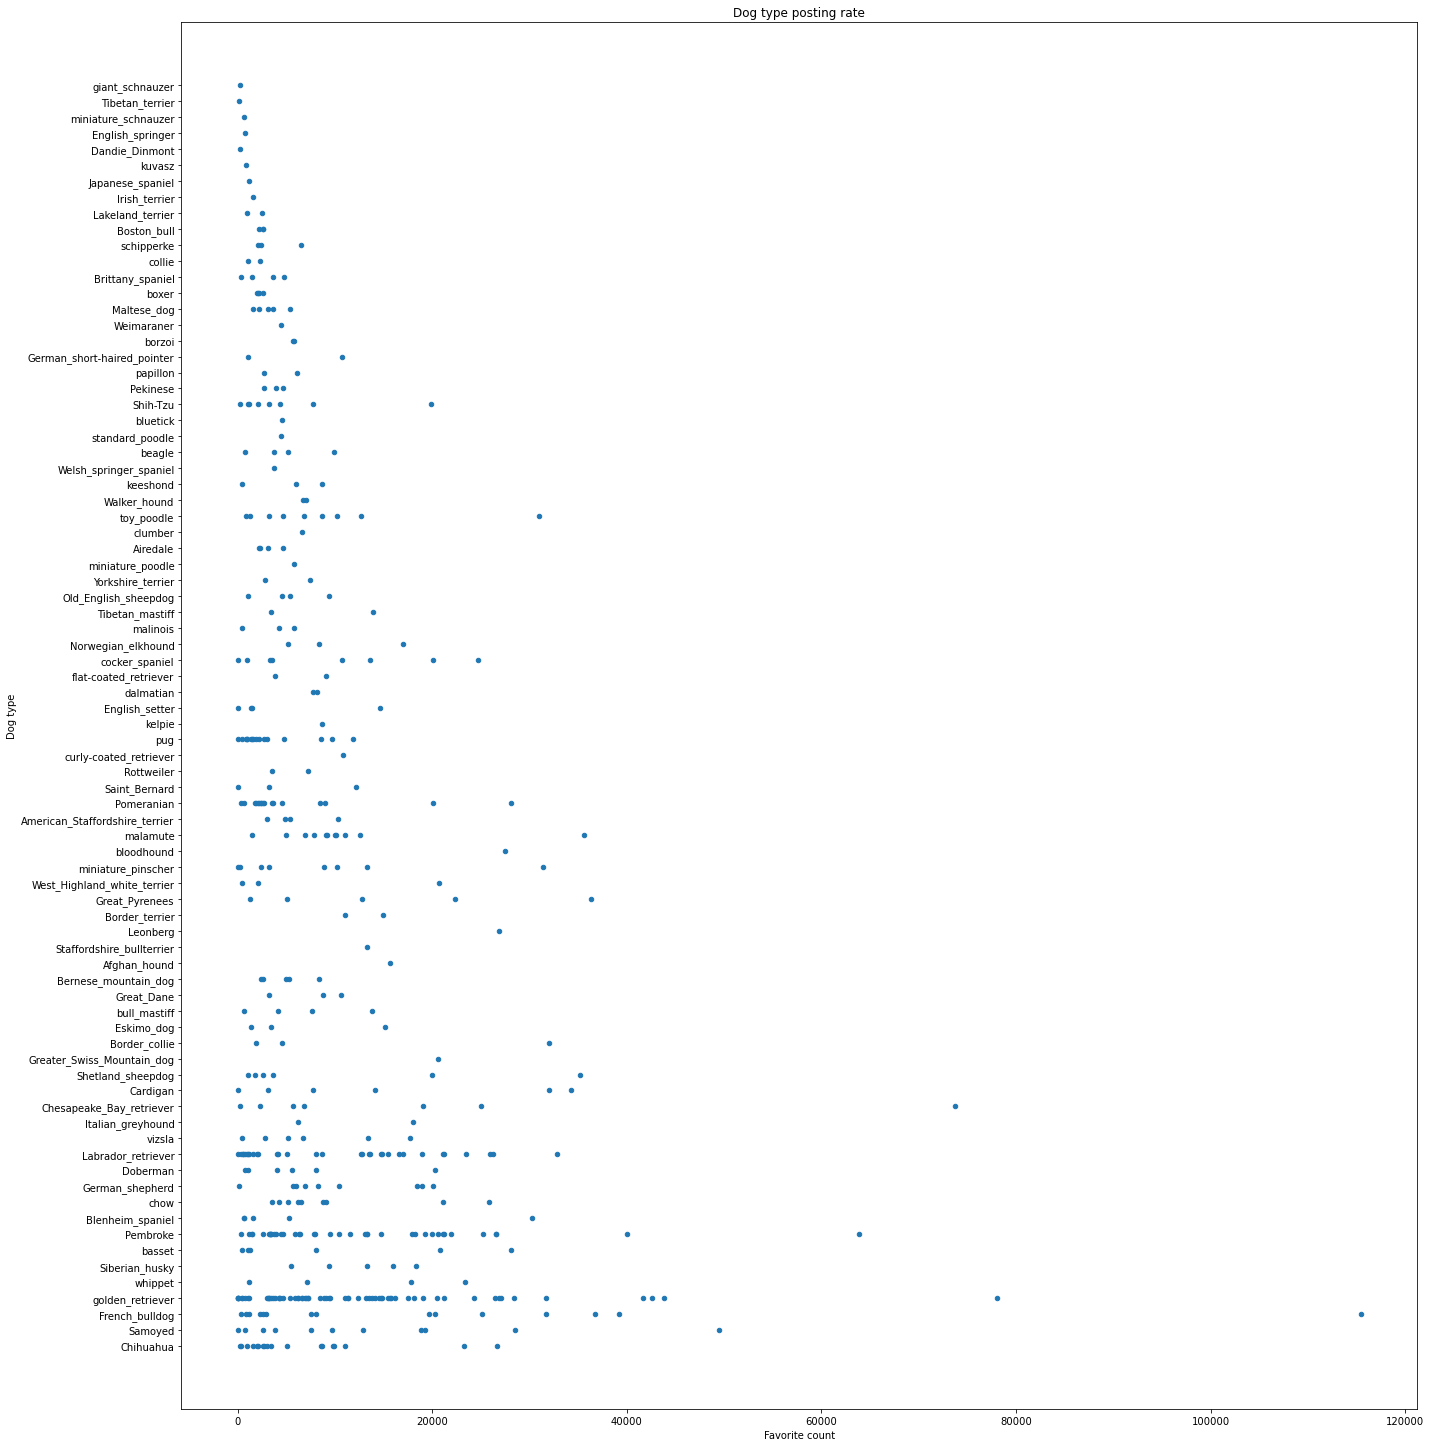

In [85]:
df_dog.plot("favorite_count", "p1", kind="scatter", figsize=(20, 20))
plt.tight_layout()
plt.title("Dog type posting rate");
plt.xlabel("Favorite count");
plt.ylabel("Dog type");

Most Used rating system is 12/10 while 2/10, 27/10, and 24/7 is the least used rating

In [91]:
# checking rating counts
rating_l = list(set(df_dog.rating))
for i in range(len(rating_l)):
    num = df_dog[df_dog.rating == rating_l[i]].shape[0]
    print("number of ratings {}-- {}".format(rating_l[i], num))

number of ratings 7/10-- 3
number of ratings 13/10-- 73
number of ratings 2/10-- 1
number of ratings 11/10-- 104
number of ratings 10/10-- 85
number of ratings 8/10-- 18
number of ratings 9/10-- 28
number of ratings 14/10-- 7
number of ratings 5/10-- 4
number of ratings 27/10-- 1
number of ratings 24/7-- 1
number of ratings 6/10-- 2
number of ratings 12/10-- 126


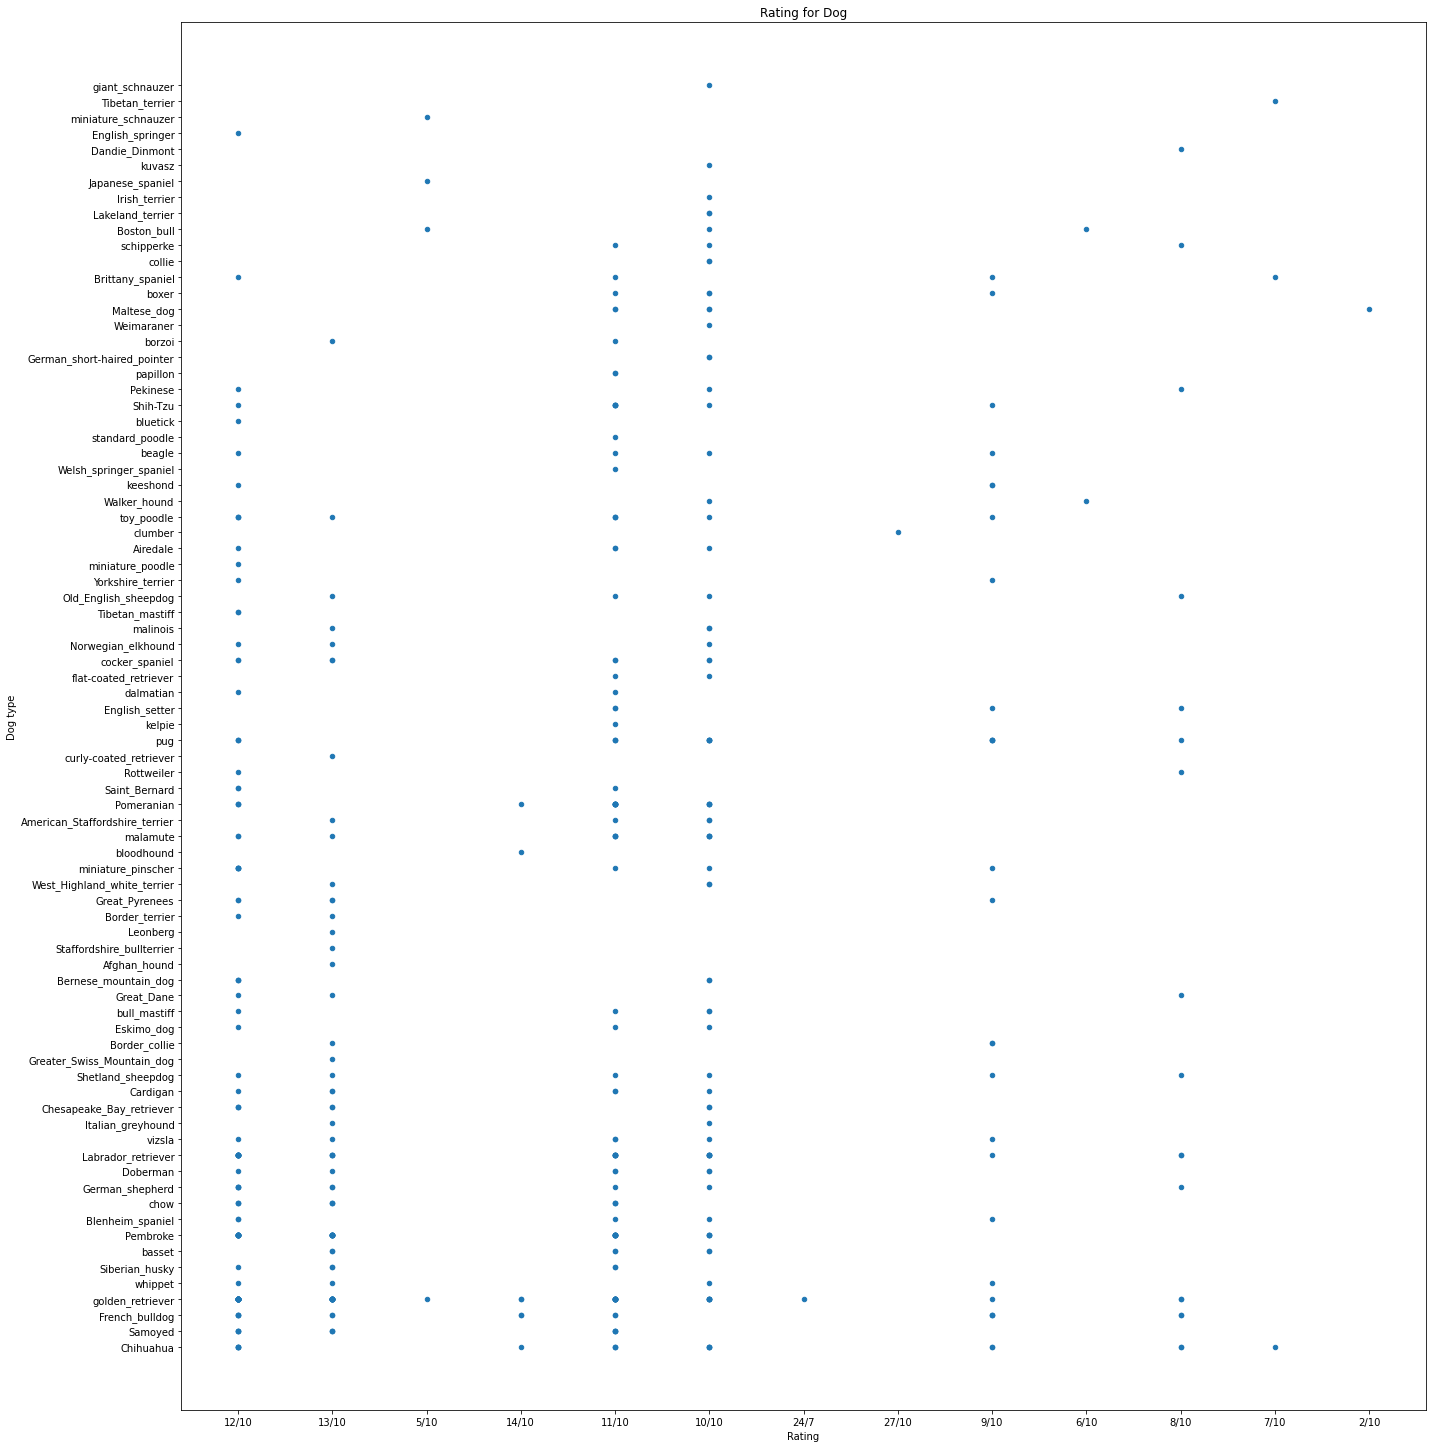

In [89]:
df_dog.plot("rating", "p1", kind="scatter", figsize=(20, 20))
plt.tight_layout()
plt.title("Rating for Dog");
plt.xlabel("Rating");
plt.ylabel("Dog type");

## Conclusion
In ConclusionI reliazed that 12/10 is the most used rating out of all of them, and  when posted people certainly prefer french bulldog pictures.
I also noticed most users post Golden Retrievers it appears to be the most posted dog out of all of them.